In [3]:
import sys
sys.path.insert(0, '../python')
%matplotlib inline
from detector import detector
from parseData import parseChar2013
from arrayOp import stack2image
from imgOp import image_load, image2edge, image_norm, imShow, image2bb, image_save
from fileOp import codebook_load, data_load, pickle_load
from featExt import maximalResize, conv2d
from scipy.misc import imresize
import pickle

In [39]:
# Generate coarse detector hotmaps
psize = 32
ssize = 16
nob = 3
ratio = 0.95
rpower = ratio ** numpy.asarray(range(20))
para0 = 0.8
para1 = 0.3
imdir = '../icdar2013/task21_22/train/image'
codeBookName = 'codeBook.npy'
classifierName = '../data/ex0/clf/icdar2013charadaboost'
resdir = '../testResult/'
parseGTName = 'parsedGT'
cdirname = '../data/ex2/'

codebook = codebook_load(codeBookName)
groundtruth = pickle_load(parseGTName, cdirname)
clf = pickle.load(open(classifierName))

labelMode = 'foreground'
featureMode = 'local'
mydetector = detector(codebook, groundtruth,
                      psize, ssize, nob, rpower, 
                      para0, para1,
                      labelMode, featureMode)
img = image_load('287.jpg', imdir)
res_stack = mydetector.multiscale_test(img, clf)

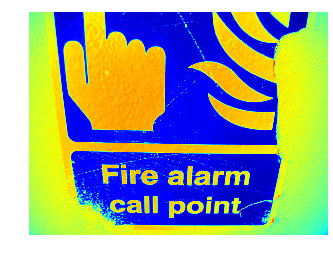

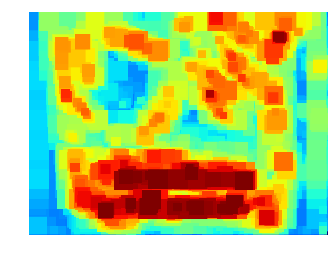

In [47]:
predim = stack2image(res_stack[1])
imShow(img.transpose())
imShow(predim.transpose())

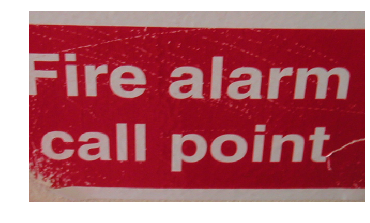

In [26]:
imdir = '../icdar2013/task21_22/train/image'
#img = image_load('287.jpg', imdir)
from scipy.misc import imread
import os
img = imread(os.path.join(imdir, '287.jpg'))
simg = img[575:945, 325:975, :]
imShow(simg)
image_save(simg, 'testROI.png', '../testResult/')

In [16]:
import matplotlib.pyplot as plt

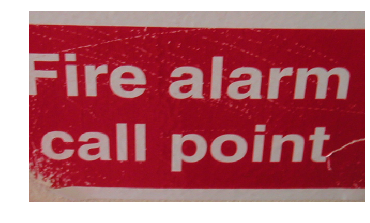

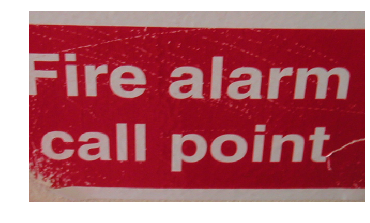

In [25]:
imShow(simg)